In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
from matplotlib import cm
import CCM as ccmfn

import network_mod as netfn

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [494]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZCON-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

os.chdir(Fdrop + 'Project/' + experiment)
lab_coord = sorted(glob.glob('*labcoord.npy*')) [2:]
reg_deltaff = sorted(glob.glob('*regdeltaff.npy*'))[2:] 
reg_trace = sorted(glob.glob('*regtrace.npy*')) [2:]
coord = sorted(glob.glob('*regcoord_0nan.npy*'))
#lab_coord, reg_deltaff, reg_trace
coord

['PTZCON-WILDTYPE-01_2photon_sess-01-6dpf_BLN-PTZ05-PTZ20_run-01_regcoord_0nan.npy',
 'PTZCON-WILDTYPE-02_2photon_sess-01-6dpf_BLN-PTZ05-PTZ20_run-01_regcoord_0nan.npy',
 'PTZCON-WILDTYPE-03_2photon_sess-01-6dpf_BLN-PTZ05-PTZ20_run-01_regcoord_0nan.npy']

In [452]:
lab[np.where(lab[:,4] != 'nan')][:,:3]

(10467, 3)

In [491]:
for i in range(len(lab_coord)):
    lab = np.load(lab_coord[i])
    trace = np.load(reg_trace[i])
    dff = np.load(reg_deltaff[i])
    sub_coord = lab[np.where(lab[:,4] != 'nan')][:,:3]
    sub_trace = trace[np.where(lab[:,4] != 'nan')]
    sub_dff = dff[np.where(lab[:,4] != 'nan')]
    namelist = lab_coord[i]
    name = namelist[:namelist.find('run')+6] 
    np.save(savepath + name + '_regcoord_0nan.npy', sub_coord)
    np.save(savepath + name + '_regtrace_0nan.npy', sub_trace)
    np.save(savepath + name + '_regdeltaff_0nan.npy', sub_dff)
    print('Done' + lab_coord[i])

DonePTZCON-WILDTYPE-03_2photon_sess-01-6dpf_BLN-PTZ05-PTZ20_run-01_labcoord.npy


In [500]:
#Rotate coordinates onto image and visualise - preregistration
from matplotlib import cm
plt.figure(figsize = (5,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(coord)))

for i in range(len(coord)):
#------------------------
    plane_num= 2
    sub_lab = np.load(coord[i])
    #sub_lab = lab[np.where(lab[:,4] != 'nan')][:,:2]
    sub_lab = (sub_lab.astype(float)).astype(int)
    plt.scatter(sub_lab[:,1],sub_lab[:,0], s = 1, c = colors[i], alpha = 1)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [4]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZCON-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*PTZ-W*-03*regcoord*0nan*')) 
dfflist = sorted(glob.glob('*PTZ-W*-03*regdeltaff*0nan*npy*')) 
tracelist = sorted(glob.glob('*PTZ-W*-03*regtrace*0nan*')) 
coordlist, dfflist, tracelist

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regcoord_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regcoord_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regcoord_0nan.npy'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regdeltaff_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regdeltaff_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regdeltaff_0nan.npy'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regtrace_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regtrace_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regtrace_0nan.npy'])

In [8]:
#Rotate coordinates onto image and visualise - preregistration
from matplotlib import cm
plt.figure(figsize = (5,5))
colors  = cm.coolwarm_r(np.linspace(0,1,len(coordlist)))

for i in range(len(coordlist)):
#------------------------
    sub_lab = np.load(coordlist[i])
    sub_lab = (sub_lab.astype(float)).astype(int)
    plt.scatter(sub_lab[:,1],sub_lab[:,0], s = 1, c = colors[i], alpha = 1)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [9]:
coordlist, dfflist, tracelist

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regcoord_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regcoord_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regcoord_0nan.npy'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regdeltaff_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regdeltaff_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regdeltaff_0nan.npy'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_regtrace_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_regtrace_0nan.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regtrace_0nan.npy'])

In [36]:
choose = 2
tracelist[choose], dfflist[choose]

('PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regtrace_0nan.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_regdeltaff_0nan.npy')

In [37]:
name = 'F01_sz-split'
trace = np.load(tracelist[choose])
dff = np.load(dfflist[choose])
np.save(savepath + name + '_trace.npy', trace)
np.save(savepath + name + '_deltaff.npy', dff)
mean = np.apply_along_axis(np.mean, 0, trace)
np.save(savepath + name + '_brainsum.npy', mean)

In [25]:
dff.shape

(7337, 9828)

In [26]:
mean = np.apply_along_axis(np.mean, 0, trace)

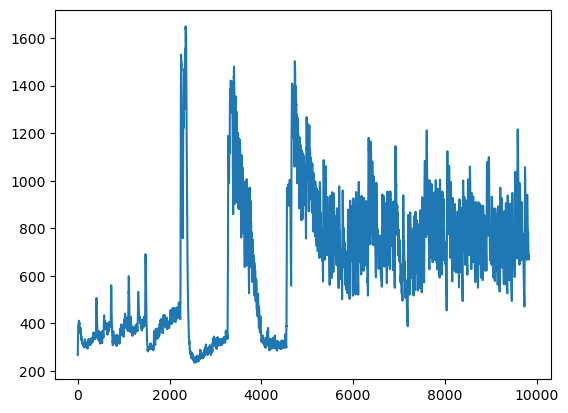

In [38]:
plt.plot(mean)
plt.show()

In [14]:
    np.save(savepath + name + '_coord.npy', coord)
    np.save(savepath + name + '_trace.npy', trace)
    np.save(savepath + name + '_deltaff.npy', dff)

    #brainsum
    mean = np.apply_along_axis(np.mean, 0, trace)
    np.save(savepath + name + '_brainsum.npy', mean)

SyntaxError: invalid syntax (<ipython-input-14-cf0d77ed220a>, line 1)

In [10]:
for i in range(len(coordlist)):
    name = 'F' + tracelist[i][tracelist[i].find('2p')-3:tracelist[i].find('2p')-1]
    fulltrace = np.load(tracelist[i])
    fulldff = np.load(dfflist[i])
    block_len = fulltrace.shape[1]//3
    pref_list = ['bln', 'pre', 'sz']
    coord = np.load(coordlist[i])
    savepath = Fdrop + 'Project/' + experiment + '/'
    ccmfn.create_timeseries(name, coord, fulltrace, fulldff, block_len, pref_list, savepath)
    print('Done' + str(i))

array([['355.94736842105266', '435.0', '97.52631578947368'],
       ['409.8125', '569.8125', '132.25'],
       ['459.375', '511.375', '118.75'],
       ...,
       ['459.5833333333333', '386.5833333333333', '256.5'],
       ['255.08333333333334', '297.1666666666667', '227.33333333333334'],
       ['153.6', '382.6', '238.2']], dtype='<U40')

In [503]:
for i in range(len(coordlist)):
    name = 'F' + tracelist[i][tracelist[i].find('2p')-3:tracelist[i].find('2p')-1]
    fulltrace = np.load(tracelist[i])
    fulldff = np.load(dfflist[i])
    block_len = fulltrace.shape[1]//3
    pref_list = ['bln', 'pre', 'sz']
    coord = np.load(coordlist[i])
    savepath = Fdrop + 'Project/' + experiment + '/'
    ccmfn.create_timeseries(name, coord, fulltrace, fulldff, block_len, pref_list, savepath)
    print('Done' + str(i))

Done0


In [53]:
for i in range(len(coordlist)):
    name = 'F' + tracelist[i][tracelist[i].find('2p')-3:tracelist[i].find('2p')-1]
    fulltrace = np.load(tracelist[i])
    block_len = fulltrace.shape[1]//3
    pref_list = ['bln', 'pre', 'sz']
    savepath = Fdrop + 'Project/' + experiment + '/'
    ccmfn.kmeans_traces(name, 40,fulltrace, block_len, pref_list, savepath)
    print('Done' + str(i))

Done0
Done1
Done2


In [509]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZCON-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('F03_trace.npy'))  
coordlist = sorted(glob.glob('F03_coord.npy'))  
dfflist = sorted(glob.glob('F03_deltaff.npy'))
brainsum = sorted(glob.glob('F03_brainsum.npy'))
si = sorted(glob.glob('F03_si.npy'))

tracelist, dfflist, brainsum, si, coordlist

(['F03_trace.npy'],
 ['F03_deltaff.npy'],
 ['F03_brainsum.npy'],
 ['F03_si.npy'],
 ['F03_coord.npy'])

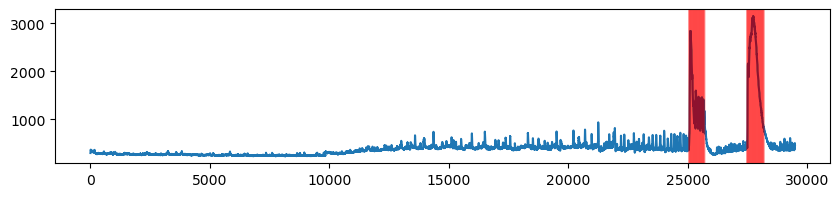

In [508]:
fig, axarr = plt.subplots(figsize = (10,2))
plt.plot(np.load(brainsum[0]))
gen_index = np.load(si[0])
for x in gen_index: plt.axvline(x=x, c='red', alpha = 0.01)
plt.show()

In [ ]:
trace = np.load(tracelist[0])
dff = np.load(dfflist[0])

for i in range(10):
    fig, axarr = plt.subplots(figsize = (10,2))
    plt.plot(dff[i])
    plt.show()

In [55]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZCON-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*E-01*realcoord.npy'))  
tot_xlist = sorted(glob.glob('*F01_xmap*'))  
bln_xlist = sorted(glob.glob('*bln*xmap*'))  
pre_xlist = sorted(glob.glob('*pre*xmap*'))  
sz_xlist = sorted(glob.glob('*sz*xmap*'))  
tot_xlist, bln_xlist, pre_xlist, sz_xlist

(['F01_xmap.h5'], ['F01_bln_xmap.h5'], ['F01_pre_xmap.h5'], ['F01_sz_xmap.h5'])

In [56]:
import h5py
tot = h5py.File(tot_xlist[0], 'r')
bln = h5py.File(bln_xlist[0], 'r')
pre = h5py.File(pre_xlist[0], 'r')
sz = h5py.File(sz_xlist[0], 'r')

In [103]:
t_ccm = np.array(tot['ccm'])
bln_ccm = np.array(bln['ccm'])
pre_ccm = np.array(pre['ccm'])
sz_ccm = np.array(sz['ccm'])

t_E = np.array(tot['embedding'])
bln_E = np.array(bln['embedding'])
pre_E = np.array(pre['embedding'])
sz_E = np.array(sz['embedding'])

t_rho = np.array(tot['rho'])
bln_rho = np.array(bln['rho'])
pre_rho = np.array(pre['rho'])
sz_rho = np.array(sz['rho'])

## Embedding distribution across all neurons

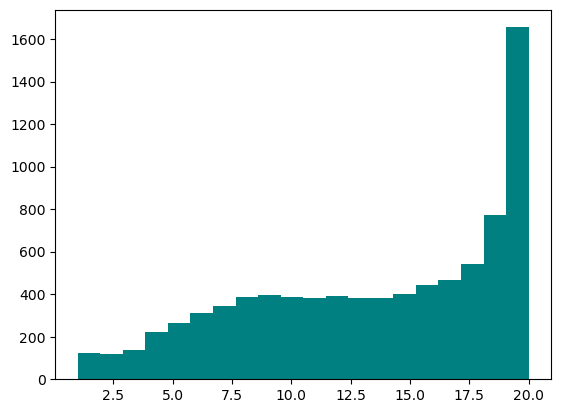

In [104]:
plt.hist(t_E[1:], bins = 20, color = 'teal')
plt.show()

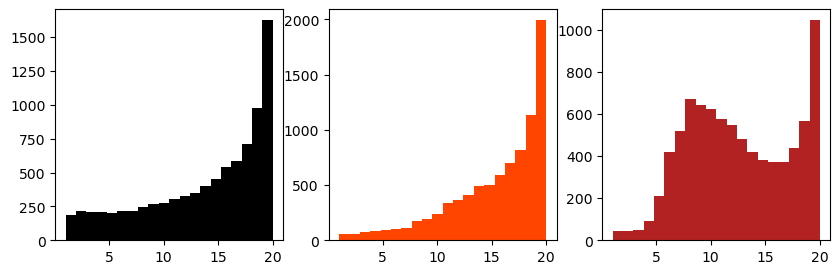

In [113]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(1,3, figsize = (10,3))
axarr[0].hist(bln_E[1:], bins = 20, color = 'k')
axarr[1].hist(pre_E[1:], bins = 20, color = 'orangered')
axarr[2].hist(sz_E[1:], bins = 20, color = 'firebrick')

plt.show()

In [122]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots( figsize = (5,5))
axarr.hist(bln_E[1:], bins = 20, color = 'k', alpha = 0.5)
axarr.hist(pre_E[1:], bins = 20, color = 'orangered', alpha = 0.5)
axarr.hist(sz_E[1:], bins = 20, color = 'firebrick', alpha = 0.5)
plt.show()

## Brainsum prediction

In [170]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(t_ccm[0,:], bins = 100, color = 'green', alpha = 0.8)
plt.hist(t_ccm[:,0], bins = 100, color = 'teal', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

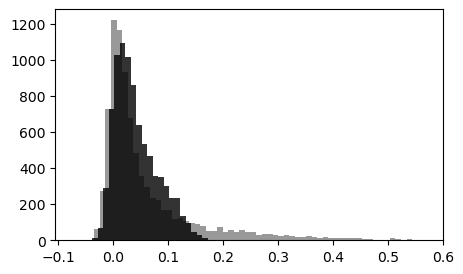

In [171]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(bln_ccm[0,:], bins = 100, color = 'grey', alpha = 0.8)
plt.hist(bln_ccm[:,0], bins = 100, color = 'k', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

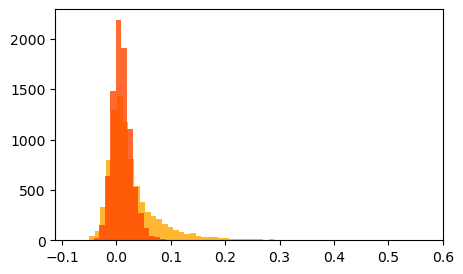

In [172]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(pre_ccm[0,:], bins = 100, color = 'orange', alpha = 0.8)
plt.hist(pre_ccm[:,0], bins = 100, color = 'orangered', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

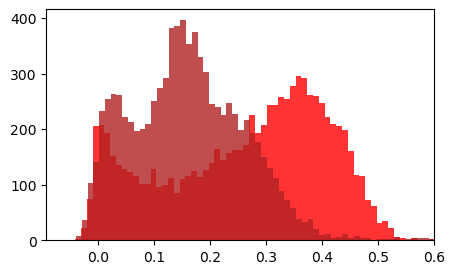

In [173]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(sz_ccm[0,:], bins = 100, color = 'red', alpha = 0.8)
plt.hist(sz_ccm[:,0], bins = 100, color = 'firebrick', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

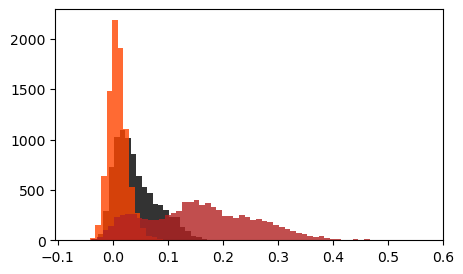

In [174]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(bln_ccm[:,0], bins = 100, color = 'k', alpha = 0.8)
plt.hist(pre_ccm[:,0], bins = 100, color = 'orangered', alpha = 0.8)
plt.hist(sz_ccm[:,0], bins = 100, color = 'firebrick', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

## Embedding dimension vs prediction skill

In [355]:
def E_ccm_heatmap(E, ccm):
    unq = np.unique(E)
    nbins = 20
    hist = np.zeros((len(unq), nbins))
    count=0
    for i in unq:
        hist[count] = np.histogram(np.ravel(ccm[np.where(E == i)]), bins = np.linspace(0, 1, nbins+1))[0]
        count+=1
    return(hist)

In [386]:
tot_hist = E_ccm_heatmap(t_E, t_ccm)
bln_hist = E_ccm_heatmap(bln_E, bln_ccm)
pre_hist = E_ccm_heatmap(pre_E, pre_ccm)
sz_hist = E_ccm_heatmap(sz_E, sz_ccm)

In [387]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

f, ax = plt.subplots(figsize = (5,5))
plot1 = ax.imshow(tot_hist, cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
ax.set_xlabel('CCM rho', size = '15')
ax.set_ylabel('E', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
ax.set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)
plt.show()

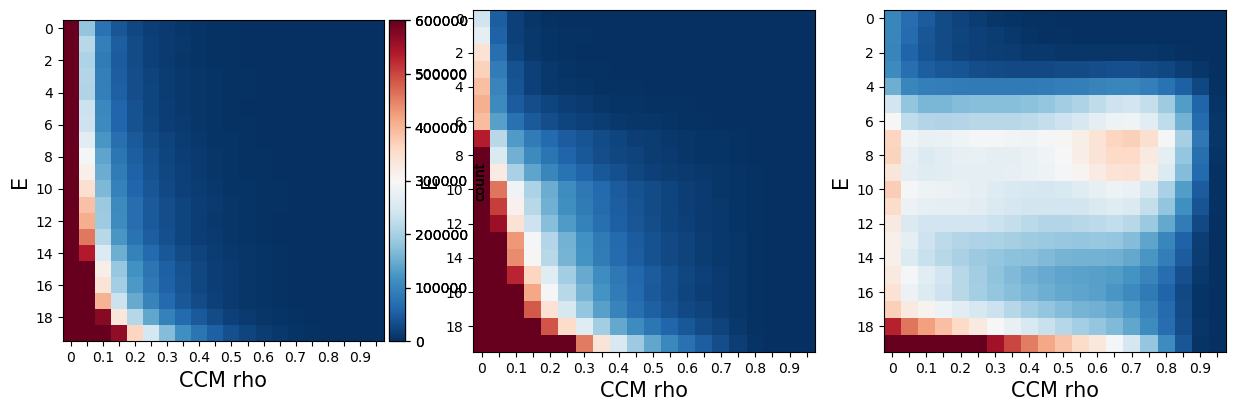

In [404]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

#Check that labelled image has been built correctly
fig,axarr = plt.subplots(1,3, figsize = (15,6))

plot1 = axarr[0].imshow(bln_hist, cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
axarr[0].set_xlabel('CCM rho', size = '15')
axarr[0].set_ylabel('E', size = '15')
axarr[0].locator_params(axis='y', nbins=10)
axarr[0].locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
axarr[0].set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)

plot1 = axarr[1].imshow(pre_hist, cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
axarr[1].set_xlabel('CCM rho', size = '15')
axarr[1].set_ylabel('E', size = '15')
axarr[1].locator_params(axis='y', nbins=10)
axarr[1].locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
axarr[1].set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)

plot1 = axarr[2].imshow(sz_hist, cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
axarr[2].set_xlabel('CCM rho', size = '15')
axarr[2].set_ylabel('E', size = '15')
axarr[2].locator_params(axis='y', nbins=10)
axarr[2].locator_params(axis='x', nbins=20)
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
axarr[2].set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)
plt.show()

## Nonlinearity residuals - CCM - linear


In [400]:
import matplotlib
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,5))
axarr.matshow(abs(np.abs(t_rho) - t_ccm ), cmap = 'magma')
plt.show()

In [409]:
import matplotlib
from matplotlib import cm
fig,axarr = plt.subplots(1,3, figsize = (15,6))
axarr[0].matshow(abs(np.abs(bln_rho) - bln_ccm ), cmap = 'magma', vmin = 0.1, vmax = 0.4)
axarr[1].matshow(abs(np.abs(pre_rho) - pre_ccm ), cmap = 'magma', vmin = 0.1, vmax = 0.4)
axarr[2].matshow(abs(np.abs(sz_rho) - sz_ccm ), cmap = 'magma', vmin = 0.1, vmax = 0.4)
plt.show()

## Spatial map

In [438]:
#Check that all neurons are overlaid correctly over brain - postregistration
coord = coord = np.load(coordlist[0])
col = t_E[1:]
fig,axarr = plt.subplots(figsize = (6,6))
plot1 = axarr.scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'E')
plt.show()

In [439]:
#Check that all neurons are overlaid correctly over brain - postregistration
coord = coord = np.load(coordlist[0])

fig,axarr = plt.subplots(1,3, figsize = (15,6))
col = bln_E[1:]
plot1 = axarr[0].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'E')

col = pre_E[1:]
plot1 = axarr[1].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[1])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'E')

col = sz_E[1:]
plot1 = axarr[2].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[2])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'E')
plt.show()

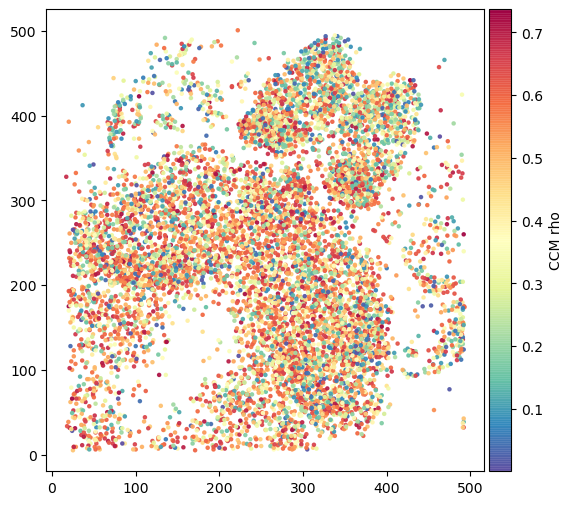

In [440]:
#Check that all neurons are overlaid correctly over brain - postregistration
coord = coord = np.load(coordlist[0])
col = np.mean(t_ccm, axis = 0)[1:]
fig,axarr = plt.subplots(figsize = (6,6))
plot1 = axarr.scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'CCM rho')
plt.show()

In [443]:
#Check that all neurons are overlaid correctly over brain - postregistration
coord = coord = np.load(coordlist[0])

fig,axarr = plt.subplots(1,3, figsize = (15,6))
col = np.mean(bln_ccm, axis = 0)[1:]
plot1 = axarr[0].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'CCM rho')

col = np.mean(pre_ccm, axis = 0)[1:]
plot1 = axarr[1].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[1])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'CCM rho')

col = np.mean(sz_ccm, axis = 0)[1:]
plot1 = axarr[2].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr[2])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'CCM rho')
plt.show()